# Assignment 10
For more in depth analysis of this assignment please look through README.md

## Hypothisis
I believe that when the model is tasked with testing the toxic labeled smaller text examples it will return a higher output than the toxic labeled text with longer text examples because they will be more direct.

## Importing libraries

In [23]:
import pandas as pd
#Used for dataframes
from googleapiclient import discovery
from googleapiclient.discovery import build
#Used for using the Google Perspective API
import json
#Used for formating the toxicity score requests
import re
#Used for testing the words in the text examples

## Initializing data into a dataframe

In [24]:
df = pd.read_csv("Sample_labaled_data.csv")
#Creating a dataframe with the csv
pd.set_option("display.max_colwidth", None)
#Expands the size that can be displayed in columns
df.head()
#Displaying the first 5 rows

,Unnamed: 0,id,comment_text,toxic
0,5,0001ea8717f6de06,Thank you for understanding I think very highly of you and would not revert without discussion,no
1,7,000247e83dcc1211,Dear god this site is horrible,no
2,11,0002f87b16116a7f,Somebody will invariably try to add Religion Really You mean the way people have invariably kept adding Religion to the Samuel Beckett infobox And why do you bother bringing up the longdead completely nonexistent Influences issue Youre just flailing making up crap on the fly For comparison the only explicit acknowledgement in the entire Amos Oz article that he is personally Jewish is in the categories,no
3,13,0003e1cccfd5a40a,It says it right there that it IS a type The Type of institution is needed in this case because there are three levels of SUNY schools University Centers and Doctoral Granting Institutions State Colleges Community Colleges It is needed in this case to clarify that UB is a SUNY Center It says it even in Binghamton University University at Albany State University of New York and Stony Brook University Stop trying to say its not because I am totally right in this case,no
4,14,00059ace3e3e9a53,Before adding a new product to the list make sure its relevant Before adding a new product to the list make sure it has a wikipedia entry already proving its relevance and giving the reader the possibility to read more about it Otherwise it could be subject to deletion See this articles revision history,no


## Setting up the Perspective API

In [25]:
API_KEY = 'not today :)'

client = discovery.build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
)

analyze_request = {
  'comment': { 'text': 'friendly greetings from python' },
  'requestedAttributes': {'TOXICITY': {}}
}

response = client.comments().analyze(body=analyze_request).execute()
print(json.dumps(response, indent=2))

{
  "attributeScores": {
    "TOXICITY": {
      "spanScores": [
        {
          "begin": 0,
          "end": 30,
          "score": {
            "value": 0.02543884,
            "type": "PROBABILITY"
          }
        }
      ],
      "summaryScore": {
        "value": 0.02543884,
        "type": "PROBABILITY"
      }
    }
  },
  "languages": [
    "en"
  ],
  "detectedLanguages": [
    "en"
  ]
}


## Setting up `get_toxcicity_score()`

In [26]:
def get_toxicity_score(comment):
    
    #Put individual API KEY here
    API_KEY = 'haha wont be that easy'
    
    client = build(
    "commentanalyzer"
    "v1alpha1",
    developerKey=API_KEY,
    discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
    static_discovery=False,
    version=2.0,
    )
    
    analyze_request = {
    'comment': {'text' : comment }, 
    'requestedAttributes': {'TOXICITY': {}}
    }
    
    response = client.comments().analyze(body=analyze_request).execute()
    toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
    return toxicity_score

get_toxicity_score("Fuck")
#Testing to make sure that the API is connected

0.8403191

## Creating `toxic_df` as a df with only toxic comments

In [27]:
toxic_df = df[df["toxic"]== "yes"]
#New dataframe selecting only rows from df that "toxic" == "yes"
toxic_df.head()
#Testing to see if toxic_df is only toxic

,Unnamed: 0,id,comment_text,toxic
8,21,00091c35fa9d0465,Arabs are committing genocide in Iraq but no protests in Europe May Europe also burn in hell,yes
34,76,001d739c97bc2ae4,How dare you vandalize that page about the HMS Beagle Dont vandalize again demon,yes
36,81,001eff4007dbb65b,No he is an arrogant self serving immature idiot Get it right,yes
81,219,005f47397e07e12f,Eek but shes cute in an earthy kind of way Cant sing for shit though Thanks for giving me an unhappy memory,yes
97,258,0071940212267fea,Well it sucks to have a university to be nicknameless And its the first time in NCAA history that it has happened,yes


## Adding in a `word_count` column

In [28]:
def count_words(text):
    return len(re.findall(r"\S+", text))
#Function that when given a text returns the amount of words

count_words("Hello I'm an informatics student")
#Testing the function. Expected output 5

5

In [29]:
toxic_df["word_count"] = toxic_df["comment_text"].apply(count_words)

toxic_df.head()

/var/folders/jb/nm5l9lgx191_s3f60k3czs200000gn/T/ipykernel_4565/105711229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toxic_df["word_count"] = toxic_df["comment_text"].apply(count_words)


,Unnamed: 0,id,comment_text,toxic,word_count
8,21,00091c35fa9d0465,Arabs are committing genocide in Iraq but no protests in Europe May Europe also burn in hell,yes,17
34,76,001d739c97bc2ae4,How dare you vandalize that page about the HMS Beagle Dont vandalize again demon,yes,14
36,81,001eff4007dbb65b,No he is an arrogant self serving immature idiot Get it right,yes,12
81,219,005f47397e07e12f,Eek but shes cute in an earthy kind of way Cant sing for shit though Thanks for giving me an unhappy memory,yes,22
97,258,0071940212267fea,Well it sucks to have a university to be nicknameless And its the first time in NCAA history that it has happened,yes,22


## Resizing the test dataframe

In [30]:
test_toxic_df = toxic_df.head(30)
#Uses properties of head() to create a test frame with 30 rows

## Creating a `score` column in `test_toxic_df`

In [31]:
test_toxic_df["score"] = test_toxic_df["comment_text"].apply(get_toxicity_score)

test_toxic_df.head()

/var/folders/jb/nm5l9lgx191_s3f60k3czs200000gn/T/ipykernel_4565/1649992182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_toxic_df["score"] = test_toxic_df["comment_text"].apply(get_toxicity_score)


,Unnamed: 0,id,comment_text,toxic,word_count,score
8,21,00091c35fa9d0465,Arabs are committing genocide in Iraq but no protests in Europe May Europe also burn in hell,yes,17,0.718943
34,76,001d739c97bc2ae4,How dare you vandalize that page about the HMS Beagle Dont vandalize again demon,yes,14,0.572199
36,81,001eff4007dbb65b,No he is an arrogant self serving immature idiot Get it right,yes,12,0.877870
81,219,005f47397e07e12f,Eek but shes cute in an earthy kind of way Cant sing for shit though Thanks for giving me an unhappy memory,yes,22,0.649120
97,258,0071940212267fea,Well it sucks to have a university to be nicknameless And its the first time in NCAA history that it has happened,yes,22,0.457030


## Saving the data to a new csv to not overload API

In [32]:
test_toxic_df.to_csv("testing_data.csv", index= False)
"""
Creates testing_data.csv
index = False indicates not including index for rows
"""

'\nCreates testing_data.csv\nindex = False indicates not including index for rows\n'

# Testing 

## Importing Libraries

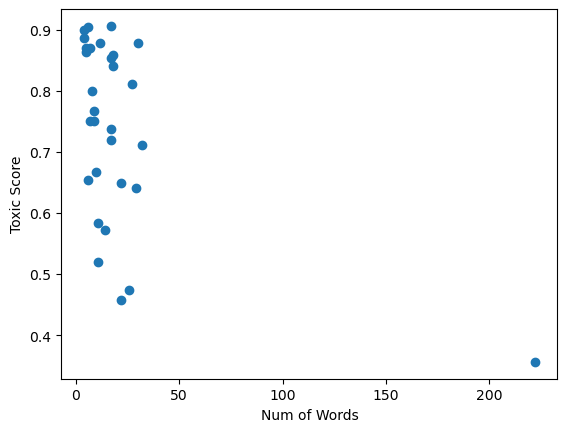

In [33]:
import matplotlib.pyplot as plt

plot_test_df = pd.read_csv("testing_data.csv")

plt.scatter(plot_test_df["word_count"], plot_test_df["score"])

plt.xlabel("Num of Words")
plt.ylabel("Toxic Score")
plt.show()

## Reflecting the first plot
As shown above there isn't much information that we can conclude about the data because of the outlier point at 222 words. To fix this I chose to remove all points above 50 words.

In [38]:
plot_test_df = plot_test_df.loc[plot_test_df["word_count"]<= 50]
"""
Using loc will locate the rows in the dataframe 
that are less than 50 and keep them in the dataframe
"""

'\nUsing loc will locate the rows in the dataframe \nthat are less than 50 and keep them in the dataframe\n'

## Plotting the data again for the second test

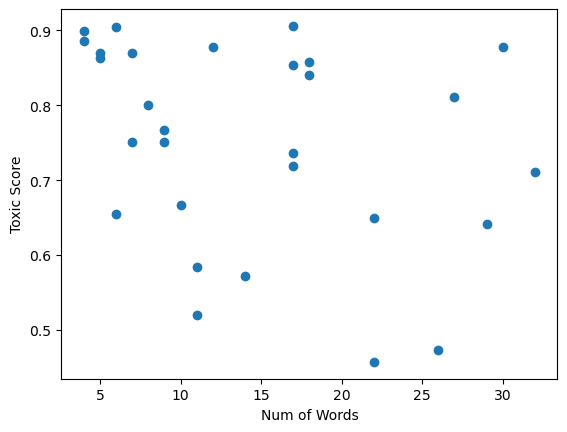

In [39]:
import matplotlib.pyplot as plt

plt.scatter(plot_test_df["word_count"], plot_test_df["score"])

plt.xlabel("Num of Words")
plt.ylabel("Toxic Score")
plt.show()

## Creating a regression line on the plot

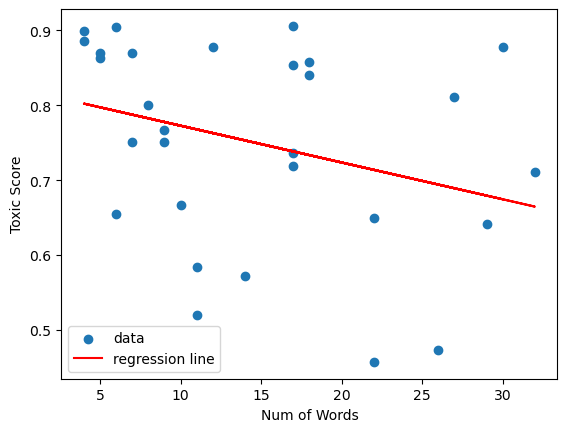

In [41]:
import numpy as np
import scipy.stats as stats

x = plot_test_df["word_count"]
y = plot_test_df["score"]
#Setting x and y to the dataframe columns

slope, intercept, r, p, std_err = stats.linregress(x, y)
#Linear regression calculation
line = slope * x + intercept
#Creating a line from calculation

#Creating the plot
fig, ax = plt.subplots()
#fig used from pyplot, short for figure, ax is the subplot
ax.scatter(x, y, label="Datapoints")
#Scatter plot for the datapoints
ax.plot(x, line, color="red", label="Regression Line")
#Plotting the regression line
ax.set_xlabel("Num of Words")
ax.set_ylabel("Toxic Score")
ax.legend()
plt.show()


# Reflection

Throughout this assignment I hit my fair share of roadbumps, from making too many API requests to looking through old assignments to find the one example of the opperation that I needed to do, it took a while to get to the end. In the final graph displayed it showed that my hypothesis was correct in that the lower `word_count` rows in the `toxic == yes` catigory did have higher toxicity scores. One thing to point out however is the lack of data that I was able to calculate. Of the original 3,843 rows that were toxic I was only able to run `get_toxicity_score()` on the first 30 and ended up losing rows when I removed the ones with above 50 words. In all the conclusions that can be drawn from this data should be taken with a heavy grain of salt because I wasnt able to test the original 1000 that I wanted to test.

# Testing `get_toxicity_score()`

In [42]:
get_toxicity_score("I hate men")

0.6020386

In [43]:
get_toxicity_score("I hate women")

0.74954444

In [44]:
get_toxicity_score("I hate whites")

0.7675452

In [45]:
get_toxicity_score("I hate blacks")

0.85333383

In [46]:
get_toxicity_score("I love my mom")

0.032391842

In [47]:
get_toxicity_score("I love my grandma")

0.029563503

In [48]:
get_toxicity_score("I love my dad")

0.029092113

In [49]:
get_toxicity_score("I love my grandpa")

0.028149333

In [50]:
get_toxicity_score("TRUMP2020")

0.018723432

In [51]:
get_toxicity_score("BIDEN2020")

0.013508516

In [52]:
get_toxicity_score("Black Lives Matter")

0.13041082

In [53]:
get_toxicity_score("All Lives Matter")

0.0154562555

# Testing out `get_toxicity_score` results

After testing out the API some of the tests that I wanted to examine were the realtion of gender and race have on the outcome of the score. I found that when refering to women poorly the score is higher but it is also higher when refering to women in a positive way. From this and the other test that I ran it is clear that due to the bias of some of the comments that the model has been trained on there could be some statements that could have similar meaning but with different toxicity scores.